# Movie Recommendations

### Setting directory and importing essential libraries

In [7]:
setwd("C:/Users/Pranav/Desktop/Data Mining/Project")

In [8]:
library(recommenderlab)
library(ggplot2)
library(data.table)
library(reshape2)

### Loading Datasets

In [12]:
movie_data = read.csv('movies.csv', stringsAsFactors = FALSE)
ratings_data = read.csv('ratings.csv')

In [13]:
head(movie_data)

,movieId,title,genres
,<int>,<chr>,<chr>
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,2,Jumanji (1995),Adventure|Children|Fantasy
3,3,Grumpier Old Men (1995),Comedy|Romance
4,4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,5,Father of the Bride Part II (1995),Comedy
6,6,Heat (1995),Action|Crime|Thriller


In [15]:
str(movie_data)

'data.frame':	10329 obs. of  3 variables:
 $ movieId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ title  : chr  "Toy Story (1995)" "Jumanji (1995)" "Grumpier Old Men (1995)" "Waiting to Exhale (1995)" ...
 $ genres : chr  "Adventure|Animation|Children|Comedy|Fantasy" "Adventure|Children|Fantasy" "Comedy|Romance" "Comedy|Drama|Romance" ...


In [16]:
head(ratings_data)

,userId,movieId,rating,timestamp
,<int>,<int>,<dbl>,<int>
1,1,16,4.0,1217897793
2,1,24,1.5,1217895807
3,1,32,4.0,1217896246
4,1,47,4.0,1217896556
5,1,50,4.0,1217896523
6,1,110,4.0,1217896150


In [17]:
summary(ratings_data)

     userId         movieId           rating        timestamp        
 Min.   :  1.0   Min.   :     1   Min.   :0.500   Min.   :8.286e+08  
 1st Qu.:192.0   1st Qu.:  1073   1st Qu.:3.000   1st Qu.:9.711e+08  
 Median :383.0   Median :  2497   Median :3.500   Median :1.115e+09  
 Mean   :364.9   Mean   : 13381   Mean   :3.517   Mean   :1.130e+09  
 3rd Qu.:557.0   3rd Qu.:  5991   3rd Qu.:4.000   3rd Qu.:1.275e+09  
 Max.   :668.0   Max.   :149532   Max.   :5.000   Max.   :1.452e+09  

### Data Pre-processing

In [58]:
movie_genres = as.data.frame(movie_data$genres, stringsAsFactors = FALSE)
movie_genres2 = as.data.frame(tstrsplit(movie_genres[,1], "[|]", type.convert = TRUE),
                stringsAsFactors = FALSE)
colnames(movie_genres2) = c(1:10)

In [71]:
list_genre = c("Action", "Adventure", "Animation", "Children", "Comedy", "Crime","Documentary", 
                "Drama", "Fantasy","Film-Noir", "Horror", "Musical", "Mystery","Romance",
                "Sci-Fi", "Thriller", "War", "Western")
genre_mat1 = matrix(0, 10330, 18)
genre_mat1[1,] = list_genre
colnames(genre_mat1) = list_genre

In [74]:
for (index in 1:nrow(movie_genres2)){
    for (col in 1:ncol(movie_genres2)){
        gen_col = which(genre_mat1[1,] == movie_genres2[index, col])
        genre_mat1[index+1, gen_col] = 1
    }
}
genre_mat2 = as.data.frame(genre_mat1[-1,], stringsAsFactors = FALSE)
for (col in 1:ncol(genre_mat2)){
    genre_mat2[,col] = as.integer(genre_mat2[,col])
}

str(genre_mat2)

'data.frame':	10329 obs. of  18 variables:
 $ Action     : int  0 0 0 0 0 1 0 0 1 1 ...
 $ Adventure  : int  1 1 0 0 0 0 0 1 0 1 ...
 $ Animation  : int  1 0 0 0 0 0 0 0 0 0 ...
 $ Children   : int  1 1 0 0 0 0 0 1 0 0 ...
 $ Comedy     : int  1 0 1 1 1 0 1 0 0 0 ...
 $ Crime      : int  0 0 0 0 0 1 0 0 0 0 ...
 $ Documentary: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Drama      : int  0 0 0 1 0 0 0 0 0 0 ...
 $ Fantasy    : int  1 1 0 0 0 0 0 0 0 0 ...
 $ Film-Noir  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Horror     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Musical    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Mystery    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Romance    : int  0 0 1 1 0 0 1 0 0 0 ...
 $ Sci-Fi     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Thriller   : int  0 0 0 0 0 1 0 0 0 1 ...
 $ War        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Western    : int  0 0 0 0 0 0 0 0 0 0 ...


In [69]:
search_matrix = cbind(movie_data[,1:2], genre_mat2[])
head(search_matrix)

,movieId,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,Toy Story (1995),0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2,Jumanji (1995),0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
5,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,6,Heat (1995),1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [91]:
rating_matrix = dcast(ratings_data, userId~movieId, value.var = 'rating', na.rm=FALSE)
rating_matrix = as.matrix(rating_matrix[,-1])
rating_matrix = as(rating_matrix,"realRatingMatrix")
rating_matrix

668 x 10325 rating matrix of class 'realRatingMatrix' with 105339 ratings.

In [88]:
recommendation_model = recommenderRegistry$get_entries(dataType = "realRatingMatrix")
lapply(recommendation_model, "[[", "description")

$HYBRID_realRatingMatrix
[1] "Hybrid recommender that aggegates several recommendation strategies using weighted averages."

$ALS_realRatingMatrix
[1] "Recommender for explicit ratings based on latent factors, calculated by alternating least squares algorithm."

$ALS_implicit_realRatingMatrix
[1] "Recommender for implicit data based on latent factors, calculated by alternating least squares algorithm."

$IBCF_realRatingMatrix
[1] "Recommender based on item-based collaborative filtering."

$LIBMF_realRatingMatrix
[1] "Matrix factorization with LIBMF via package recosystem (https://cran.r-project.org/web/packages/recosystem/vignettes/introduction.html)."

$POPULAR_realRatingMatrix
[1] "Recommender based on item popularity."

$RANDOM_realRatingMatrix
[1] "Produce random recommendations (real ratings)."

$RERECOMMEND_realRatingMatrix
[1] "Re-recommends highly rated items (real ratings)."

$SVD_realRatingMatrix
[1] "Recommender based on SVD approximation with column-mean imputation."

$SVDF_realRatingMatrix
[1] "Recommender based on Funk SVD with gradient descend (https://sifter.org/~simon/journal/20061211.html)."

$UBCF_realRatingMatrix
[1] "Recommender based on user-based collaborative filtering."

In [89]:
recommendation_model$IBCF_realRatingMatrix$parameters

$k
[1] 30

$method
[1] "Cosine"

$normalize
[1] "center"

$normalize_sim_matrix
[1] FALSE

$alpha
[1] 0.5

$na_as_zero
[1] FALSE

In [94]:
similarity_mat = similarity(ratingMatrix[1:4, ], method = "cosine", which = "users")
as.matrix(similarity_mat)

,1,2,3,4
1,0.0000000,0.9760860,0.9641723,0.9914398
2,0.9760860,0.0000000,0.9925732,0.9374253
3,0.9641723,0.9925732,0.0000000,0.9888968
4,0.9914398,0.9374253,0.9888968,0.0000000


In [96]:
movie_similarity = similarity(ratingMatrix[, 1:4], method = "cosine", which = "items")
as.matrix(movie_similarity)

,1,2,3,4
1,0.0000000,0.9669732,0.9559341,0.9101276
2,0.9669732,0.0000000,0.9658757,0.9412416
3,0.9559341,0.9658757,0.0000000,0.9864877
4,0.9101276,0.9412416,0.9864877,0.0000000


### Data Visualization

In [99]:
movie_views = colCounts(ratingMatrix)
table_views = data.frame(movie = names(movie_views), views = movie_views)
table_views = table_views[order(table_views$views, decreasing = TRUE),] # sort by number of views
table_views$title = NA
for (index in 1:10325){
  table_views[index,3] = as.character(subset(movie_data, 
                         movie_data$movieId == table_views[index,1])$title)
}
table_views[1:6,]

,movie,views,title
,<chr>,<int>,<chr>
296,296,325,Pulp Fiction (1994)
356,356,311,Forrest Gump (1994)
318,318,308,"Shawshank Redemption, The (1994)"
480,480,294,Jurassic Park (1993)
593,593,290,"Silence of the Lambs, The (1991)"
260,260,273,Star Wars: Episode IV - A New Hope (1977)


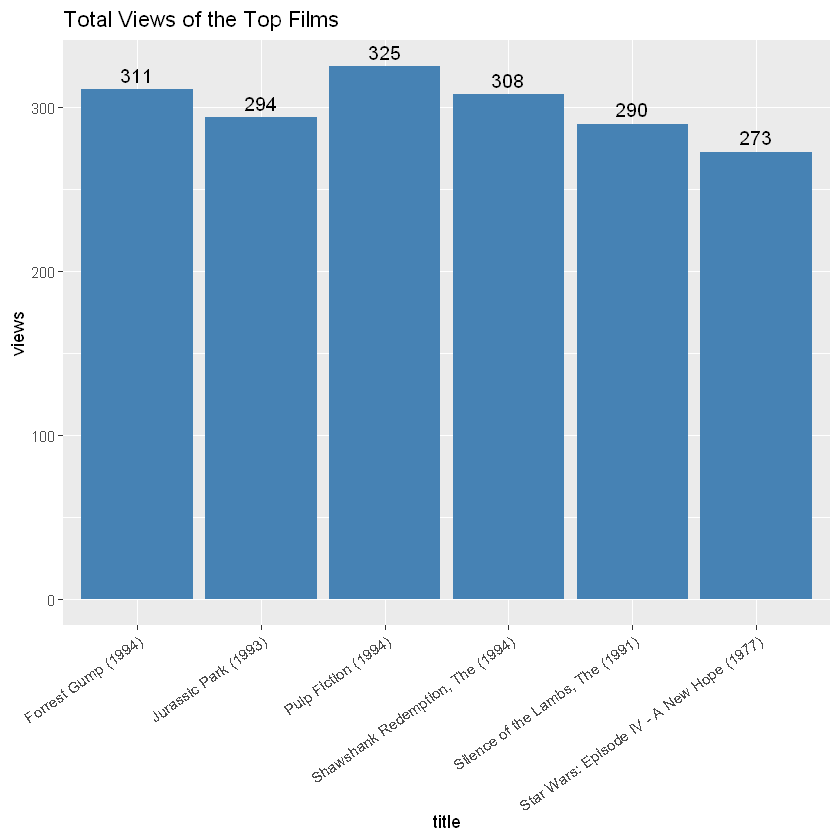

In [117]:
ggplot(table_views[1:6, ], aes(x = title, y = views)) +
  geom_bar(stat="identity", fill = 'steelblue') +
  geom_text(aes(label=views), vjust=-0.5, size=4.0) +
  theme(axis.text.x = element_text(angle = 35, hjust = 1)) +
  ggtitle("Total Views of the Top Films")

### Data Preparation

In [119]:
movie_ratings = ratingMatrix[rowCounts(ratingMatrix) > 50, colCounts(ratingMatrix) > 50]
movie_ratings

420 x 447 rating matrix of class 'realRatingMatrix' with 38341 ratings.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



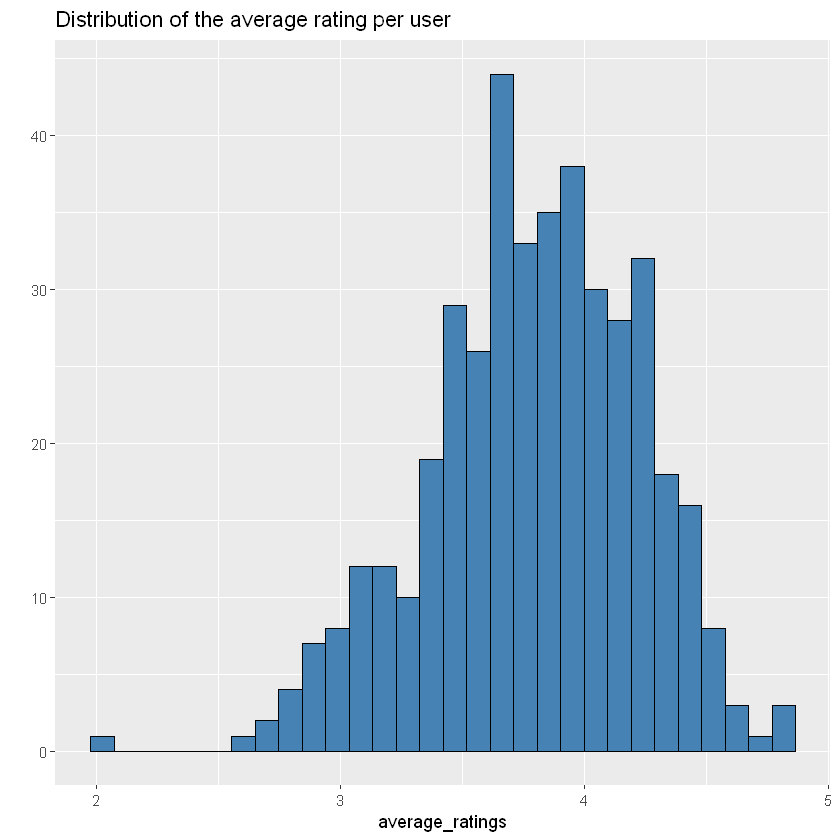

In [124]:
average_ratings = rowMeans(movie_ratings)
qplot(average_ratings, fill=I("steelblue"), col=I("black")) +
  ggtitle("Distribution of the average rating per user")

[1] 0

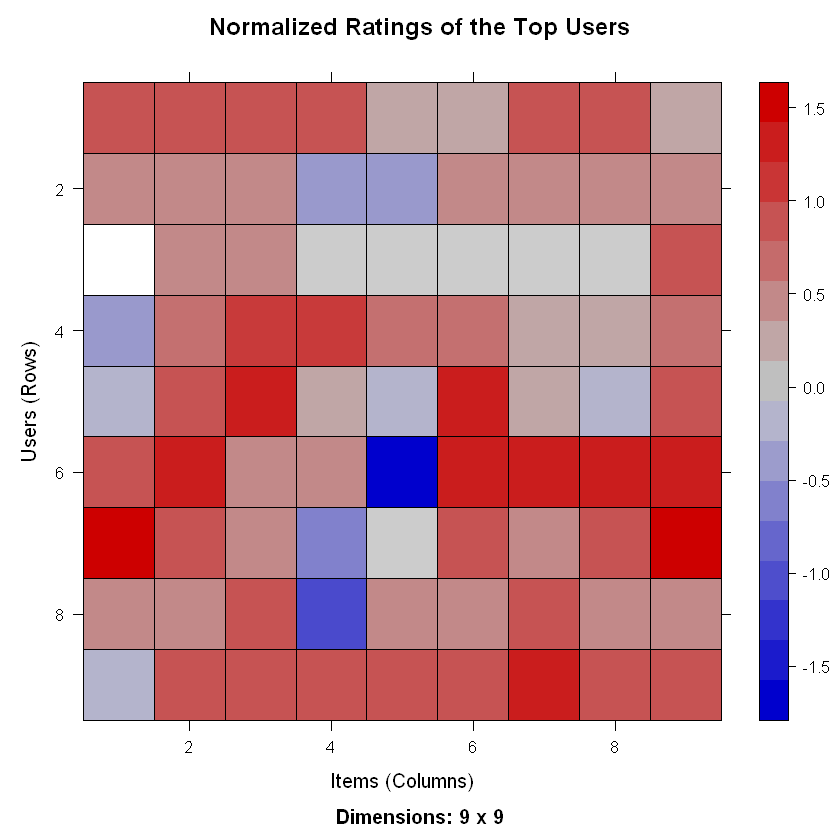

In [128]:
minimum_movies = quantile(rowCounts(movie_ratings), 0.98)
minimum_users = quantile(colCounts(movie_ratings), 0.98)

normalized_ratings = normalize(movie_ratings)
sum(rowMeans(normalized_ratings) > 0.00001)
image(normalized_ratings[rowCounts(normalized_ratings) > minimum_movies,
    colCounts(normalized_ratings) > minimum_users], main = "Normalized Ratings of the Top Users")

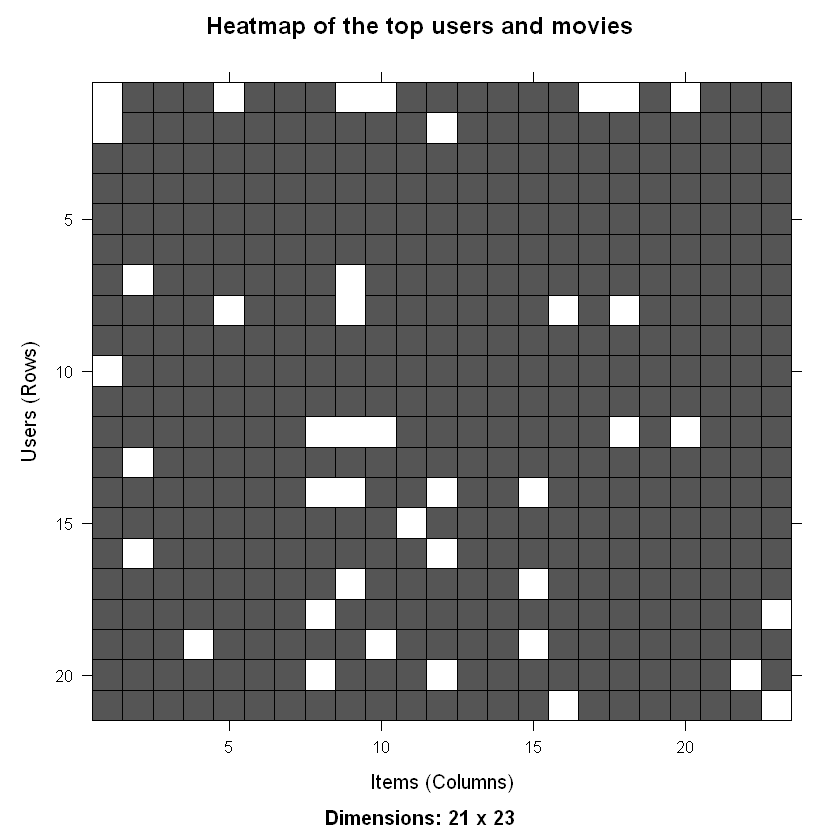

In [129]:
binary_minimum_movies = quantile(rowCounts(movie_ratings), 0.95)
binary_minimum_users = quantile(colCounts(movie_ratings), 0.95)
# movies_watched = binarize(movie_ratings, minRating = 1)
good_rated_films = binarize(movie_ratings, minRating = 3)
image(good_rated_films[rowCounts(movie_ratings) > binary_minimum_movies,
colCounts(movie_ratings) > binary_minimum_users],
main = "Heatmap of the top users and movies")

### Recommendation system

In [130]:
sampled_data = sample(x = c(TRUE,FALSE),size = nrow(movie_ratings),replace = TRUE,prob = c(0.8, 0.2))
training_data = movie_ratings[sampled_data, ]
testing_data = movie_ratings[!sampled_data, ]

In [131]:
recommendation_system = recommenderRegistry$get_entries(dataType ="realRatingMatrix")
recommendation_system$IBCF_realRatingMatrix$parameters

$k
[1] 30

$method
[1] "Cosine"

$normalize
[1] "center"

$normalize_sim_matrix
[1] FALSE

$alpha
[1] 0.5

$na_as_zero
[1] FALSE

In [133]:
recommen_model = Recommender(data = training_data, method = "IBCF", parameter = list(k = 30))
recommen_model
class(recommen_model)

Recommender of type 'IBCF' for 'realRatingMatrix' 
learned using 338 users.

[1] "Recommender"
attr(,"package")
[1] "recommenderlab"

[1] "dgCMatrix"
attr(,"package")
[1] "Matrix"

[1] 447 447

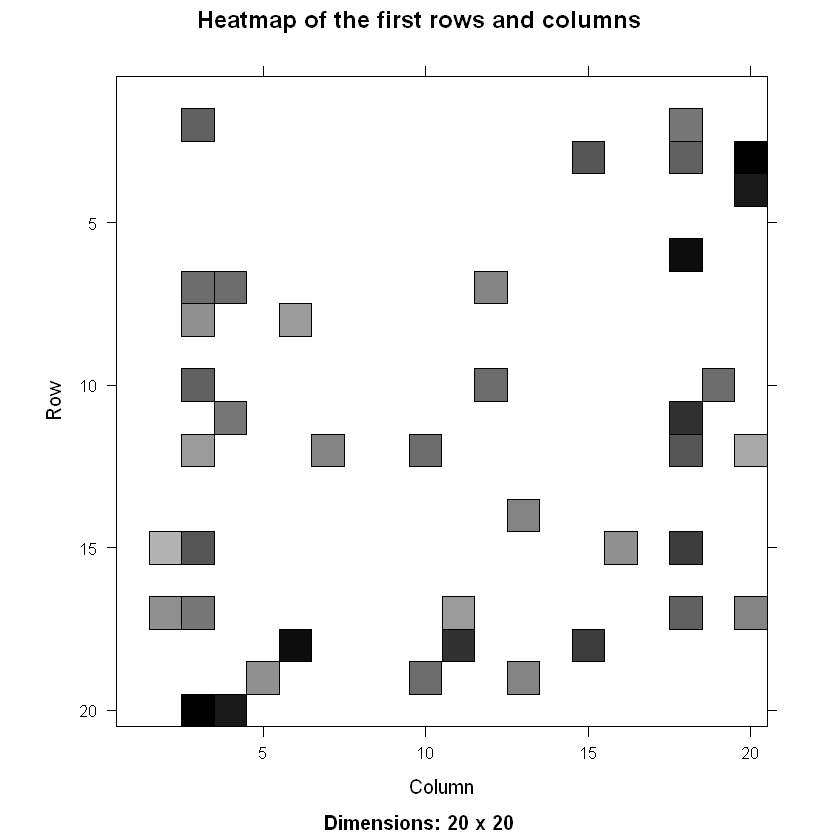

In [134]:
model_info = getModel(recommen_model)
class(model_info$sim)
dim(model_info$sim)
top_items = 20
image(model_info$sim[1:top_items, 1:top_items],
   main = "Heatmap of the first rows and columns")

sum_rows
 30 
447 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



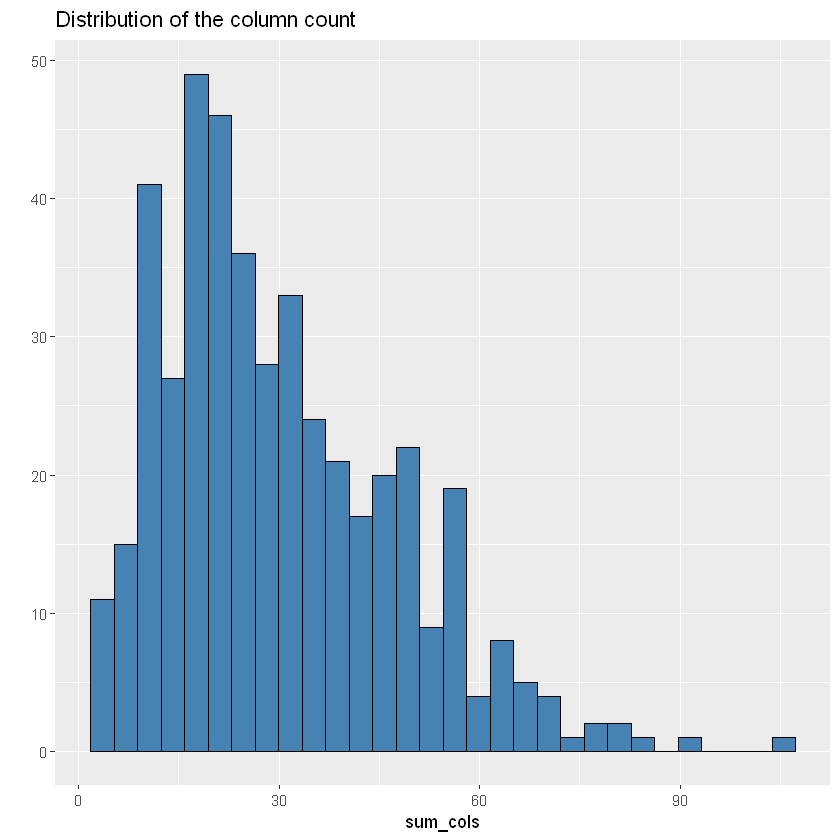

In [135]:
sum_rows = rowSums(model_info$sim > 0)
table(sum_rows)
sum_cols = colSums(model_info$sim > 0)
qplot(sum_cols, fill=I("steelblue"), col=I("black"))+ ggtitle("Distribution of the column count")

In [137]:
top_recommendations = 10
predicted_recommendations = predict(object=recommen_model,newdata=testing_data,n=top_recommendations)
predicted_recommendations

Recommendations as 'topNList' with n = 10 for 82 users. 

In [138]:
user1 = predicted_recommendations@items[[1]]
movies_user1 = predicted_recommendations@itemLabels[user1]
movies_user2 = movies_user1
for (index in 1:10){
  movies_user2[index]=as.character(subset(movie_data, movie_data$movieId==movies_user1[index])$title)
}
movies_user2

[1] "Toy Story (1995)"                                                
 [2] "Casino (1995)"                                                   
 [3] "Sense and Sensibility (1995)"                                    
 [4] "Leaving Las Vegas (1995)"                                        
 [5] "Twelve Monkeys (a.k.a. 12 Monkeys) (1995)"                       
 [6] "Seven (a.k.a. Se7en) (1995)"                                     
 [7] "Star Wars: Episode IV - A New Hope (1977)"                       
 [8] "Like Water for Chocolate (Como agua para chocolate) (1992)"      
 [9] "LÃ©on: The Professional (a.k.a. The Professional) (LÃ©on) (1994)"
[10] "What's Eating Gilbert Grape (1993)"

In [139]:
recommendation_matrix <- sapply(predicted_recommendations@items,
                      function(x){ as.integer(colnames(movie_ratings)[x]) })
#dim(recc_matrix)
recommendation_matrix[,1:4]

1,6,7438,6
16,17,778,17
17,62,2997,185
25,235,58559,261
32,288,1263,288
47,440,4979,368
260,593,111,590
265,908,529,594
293,913,551,733
337,923,903,736


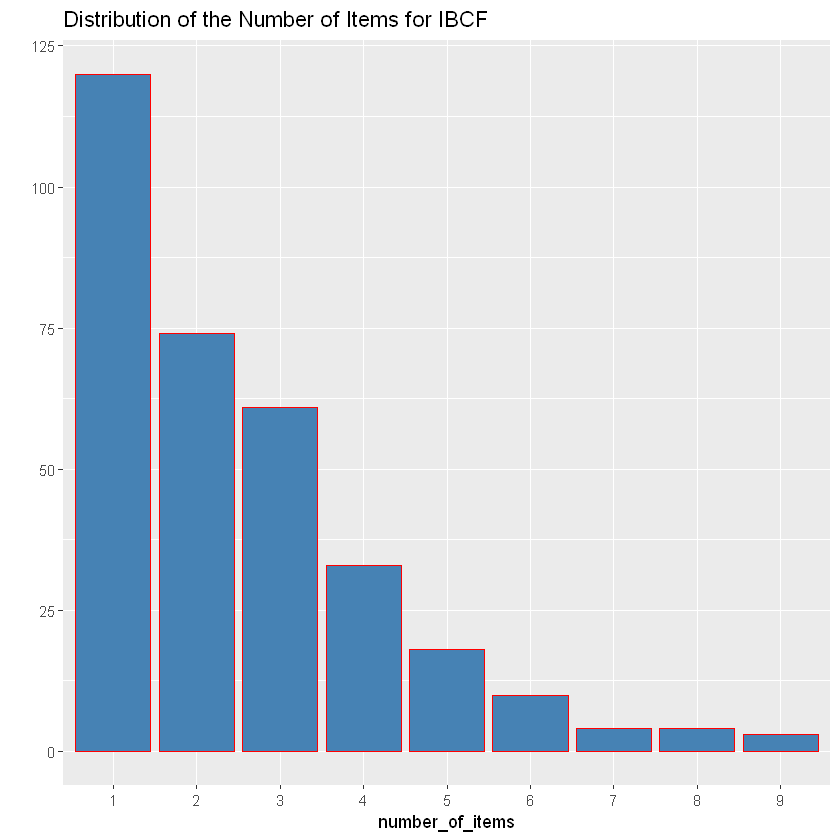

In [142]:
number_of_items <- factor(table(recommendation_matrix))
chart_title <- "Distribution of the Number of Items for IBCF"
qplot(number_of_items, fill=I("steelblue"), col=I("red")) + ggtitle(chart_title)

In [143]:
number_of_items_sorted <- sort(number_of_items, decreasing = TRUE)
number_of_items_top <- head(number_of_items_sorted, n = 4)
table_top <- data.frame(as.integer(names(number_of_items_top)),
number_of_items_top)
for(i in 1:4) {
table_top[i,1] <- as.character(subset(movie_data,
movie_data$movieId == table_top[i,1])$title)
}
colnames(table_top) <- c("Movie Title", "No. of Items")
head(table_top)

,Movie Title,No. of Items
,<chr>,<fct>
17,Sense and Sensibility (1995),9
25,Leaving Las Vegas (1995),9
235,Ed Wood (1994),9
6,Heat (1995),8
